In [95]:
import pandas as pd
import seaborn as sns

In [96]:
df = pd.read_excel('ChronicKidneyDisease.xlsx')

# Data Clensing

In [97]:
missing_values = ['?']
df = pd.read_excel('ChronicKidneyDisease.xlsx',na_values=missing_values)

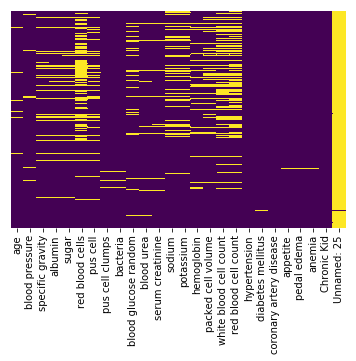

In [98]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [99]:
df.head(5)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid,Unnamed: 25
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,NaN
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000.0,NaN,no,no,no,good,no,no,ckd,NaN
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,NaN
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,NaN
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,no,no,no,good,no,no,ckd,NaN


In [100]:
df['age'].fillna(df['age'].mean(),inplace=True)
df['blood pressure'].fillna(df['blood pressure'].mean(),inplace=True)
df['specific gravity'].fillna(df['specific gravity'].mean(),inplace=True)
df['albumin'].fillna(df['albumin'].median(),inplace=True)
df['sugar'].fillna(df['sugar'].median(),inplace=True)
df['packed cell volume'].fillna(df['packed cell volume'].median(),inplace=True)
df['hemoglobin'].fillna(df['hemoglobin'].median(),inplace=True)
df['potassium'].fillna(df['potassium'].median(),inplace=True)
df['sodium'].fillna(df['sodium'].median(),inplace=True)
df['serum creatinine'].fillna(df['serum creatinine'].median(),inplace=True)
df['blood urea'].fillna(df['blood urea'].median(),inplace=True)
df['blood glucose random'].fillna(df['blood glucose random'].median(),inplace=True)

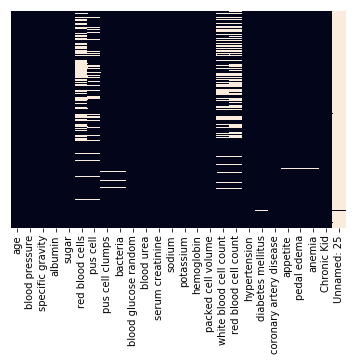

In [101]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,)

In [102]:
df = df.fillna(df['pus cell'].value_counts().index[0])

In [103]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid,Unnamed: 25
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,7800,5.2,yes,yes,no,good,no,no,ckd,normal
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,6000,normal,no,no,no,good,no,no,ckd,normal
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500,normal,no,yes,no,poor,no,yes,ckd,normal
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,normal
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300,4.6,no,no,no,good,no,no,ckd,normal


# Imputation 

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
cod = LabelEncoder()

In [123]:
fitted_df.head()

,age,blood pressure,specific gravity,albumin,sugar,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,...,potassium,hemoglobin,packed cell volume,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,Chronic Kid
0,39,4,4,1,0,1,1,1,48,23,...,17,90,31,2,3,0,0,1,0,0
1,4,0,4,4,0,1,1,1,48,5,...,17,49,25,0,1,0,0,1,0,0
2,54,4,1,2,3,1,1,1,138,40,...,17,32,18,0,3,0,3,1,2,0
3,39,2,0,4,0,0,2,1,44,43,...,0,48,19,2,1,0,3,3,2,0
4,42,4,1,2,0,1,1,1,33,13,...,17,52,22,0,1,0,0,1,0,0


# Random Forest 

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
dtree = RandomForestClassifier()

In [116]:
X = fitted_df.drop('Chronic Kid',axis=1)
y = fitted_df['Chronic Kid']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [118]:
dtree.fit(X_train,y_train)

/Users/anthonyramies/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [119]:
pred = dtree.predict(X_test)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

# Results

In [121]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98        80
           1       0.98      0.94      0.96        48

   micro avg       0.97      0.97      0.97       128
   macro avg       0.97      0.96      0.97       128
weighted avg       0.97      0.97      0.97       128

[[79  1]
 [ 3 45]]
